<a href="https://colab.research.google.com/github/lucaskydelima/Optimization-with-Python-Pyomo/blob/main/S1Example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pyomo
! apt-get install -y -qq glpk-utils

In [2]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

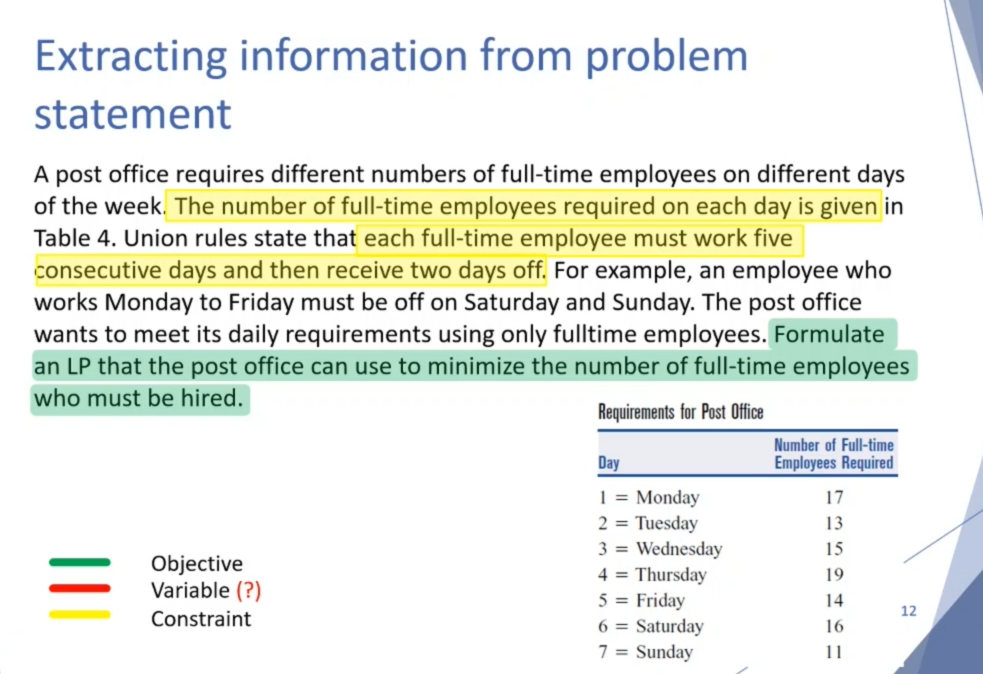

In [7]:
# Defining the model
model = pyo.ConcreteModel()

# Set
model.i = pyo.RangeSet(1,7)

# Decision Variable
model.x = pyo.Var(model.i, domain=pyo.NonNegativeIntegers)
x = model.x

# Objective Function
def Objective_rule(model, i):
  return sum(x[i] for i in model.i)
model.obj = pyo.Objective(rule=Objective_rule, sense=pyo.minimize)

# Constraints
model.const1 = pyo.Constraint(expr=x[1] + x[4] + x[5] + x[6] + x[7] >= 17, doc = 'Monday requirement')
model.const2 = pyo.Constraint(expr=x[1] + x[2] + x[5] + x[6] + x[7] >= 13, doc = 'Tuesday requirement')
model.const3 = pyo.Constraint(expr=x[1] + x[2] + x[3] + x[6] + x[7] >= 15, doc = 'Wednesday requirement')
model.const4 = pyo.Constraint(expr=x[1] + x[1] + x[3] + x[4] + x[7] >= 19, doc = 'Thursday requirement')
model.const5 = pyo.Constraint(expr=x[1] + x[2] + x[3] + x[4] + x[5] >= 14, doc = 'Friday requirement')
model.const6 = pyo.Constraint(expr=x[2] + x[3] + x[4] + x[5] + x[6] >= 16, doc = 'Saturday requirement')
model.const7 = pyo.Constraint(expr=x[3] + x[4] + x[5] + x[6] + x[7] >= 11, doc = 'Sunday requirement')

# Solve
results = pyo.SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)

results.write()
print('\n RESULTS \n')
print('Number of full-time employees who must be hired = ', model.obj())
print('Number of workers starting on Monday ', x[1]())
print('Number of workers starting on Tuesday ', x[2]())
print('Number of workers starting on Wednesday ', x[3]())
print('Number of workers starting on Thursday ', x[4]())
print('Number of workers starting on Friday ', x[5]())
print('Number of workers starting on Saturday ', x[6]())
print('Number of workers starting on Sunday ', x[7]())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 22.0
  Upper bound: 22.0
  Number of objectives: 1
  Number of constraints: 8
  Number of variables: 8
  Number of nonzeros: 35
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 5
      Number of created subproblems: 5
  Error rc: 0
  Time: 0.010755062103271484
# ----------------------------------------------------------
#   Solution Information
# -------------------------------------